# Response rates in surveys

Comparison of response rates in various large-scale surveys. 

Current data:

* SOM institute (national postal survey in Sweden
* European Social Survey (cross-national survey in European countries)

Data to add:

* World values survey
* Eurobarometer

In [11]:
!ls

ESS                   eurobarometer         wws
WDH                   previousStudies.ipynb
data                  responseRates.ipynb


In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10 # Make figures a little bigger

In [12]:
dfSOM = pd.read_csv('data/ResponseRateSOM.csv')
dfSOM.head()

,Year,N,Bruttoprocent,Nettoprocent,Fieldwork
0,1986,1 624,65,68,SCB
1,1987,1 672,67,70,SOM-institutet
2,1988,1 643,66,69,SCB
3,1989,1 578,63,66,IMU-Testologen
4,1990,1 582,63,66,IMU-Testologen


In [3]:
pd.to_datetime(dfSOM.Year, format='%Y')
tsSOM = dfSOM.set_index(dfSOM.Year)

In [13]:
dfESS = pd.read_csv('data/responseRateESS.csv')
dfESS.head()

,Country,Year,Finishyear,N,Responserate,Round
0,Sweden,01.08.14-30.01.15,2015,1 791,50.1,7
1,Denmark,12.09.14-17.02.15,2015,1 502,51.9,7
2,Sweden,01.10.12-05.05.13,2013,1 847,52.4,6
3,Denmark,10.01.13-24.04.13,2013,1 650,49.1,6
4,Sweden,27.09.10-01.03.11,2011,1 497,51.0,5


In [5]:
pd.to_datetime(dfESS.Finishyear, format='%Y')
tsESS = dfESS.set_index(dfESS.Finishyear)

Sources:
ESS - http://www.europeansocialsurvey.org/data/deviations_index.html
SOM - Vernersdotter, Frida (2016) http://som.gu.se/digitalAssets/1579/1579366_den-nationella-som-unders--kningen-2015.pdf
       


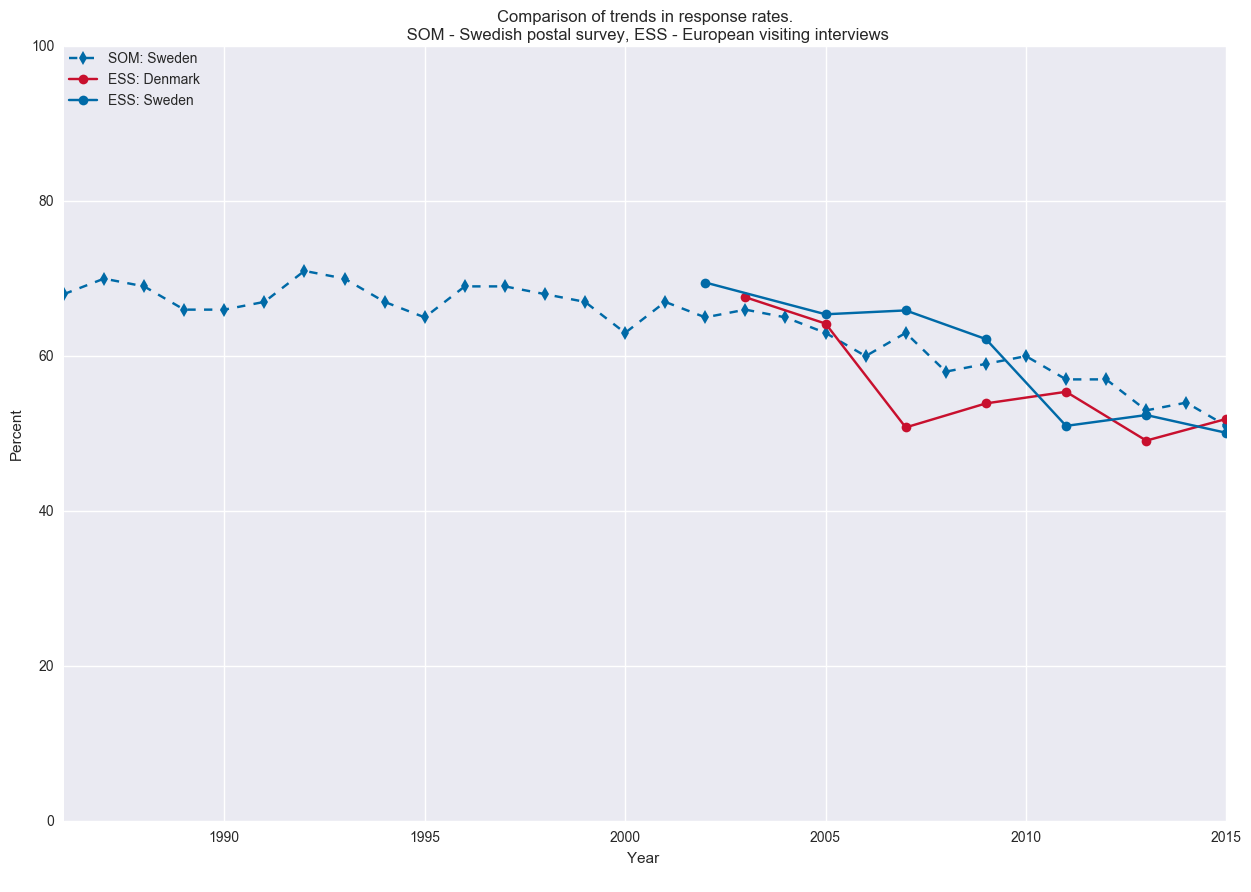

In [6]:
# Title formatting: http://matplotlib.org/users/text_intro.html
# Line styles: http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.htmlfor key, grp in tsESS.groupby(['Country']): #Iterate over data and group per country. 
# Legend guide: http://matplotlib.org/1.3.1/users/legend_guide.html


plt.title('Comparison of trends in response rates.\n SOM - Swedish postal survey, ESS - European visiting interviews')
plt.xlabel('Year \n')
plt.xlim([1986, 2015])
plt.ylabel('Percent')
plt.ylim([0, 100])

#plt.text(2002, 2, 'Some text':10})

# SOM DATA for Sweden
plt.plot(tsSOM.Nettoprocent, color='#006AA7', linestyle='--', marker='d', label='SOM: Sweden')

# ESS data for Denmark and Sweden
    if grp.Country.any() == 'Denmark': # Note: the .any() function must be used because numpy
        plt.plot(grp['Responserate'].astype(float), color='#C8102E', linestyle='-', marker='o', label='ESS: Denmark')
    elif grp.Country.any() == 'Sweden': 
        plt.plot(grp['Responserate'].astype(float), color='#006AA7', marker='o', label='ESS: Sweden')
        
plt.legend(loc=2, borderaxespad=0.)
print("Sources:\nESS - http://www.europeansocialsurvey.org/data/deviations_index.html\n\
SOM - Vernersdotter, Frida (2016) http://som.gu.se/digitalAssets/1579/1579366_den-nationella-som-unders--kningen-2015.pdf\n \
      ")